In [12]:
import os
import numpy as np
from os.path import join
import json
import pandas as pd
import matplotlib.pyplot as plt
import proplot as pplt
from collections import defaultdict
import matplotlib
import seaborn as sns
# plt.rc("text", usetex=True)


In [13]:
dirs = {
    "basic": "../results/simstudy/basic2", 
    "nonlinear" :"../results/simstudy/nonlinear2", 
    "basic_sparse" :"../results/simstudy/basic_sparse", 
    "nonlinear_sparse" :"../results/simstudy/nonlinear_sparse", 
}
files = defaultdict(list)
for d, path in dirs.items():
    fs = os.listdir(path)
    files[d].extend([f for f in fs if f > "001.log"])
files

defaultdict(list,
            {'basic': ['002.log',
              '003.log',
              '004.log',
              '005.log',
              '006.log',
              '007.log',
              '008.log',
              '009.log'],
             'nonlinear': ['002.log',
              '003.log',
              '004.log',
              '005.log',
              '006.log',
              '007.log',
              '008.log',
              '009.log'],
             'basic_sparse': ['002.log',
              '003.log',
              '004.log',
              '005.log',
              '006.log',
              '007.log',
              '008.log',
              '009.log'],
             'nonlinear_sparse': ['002.log',
              '003.log',
              '004.log',
              '005.log',
              '006.log',
              '007.log',
              '008.log',
              '009.log']})

In [14]:
values = []

for d, dpath in dirs.items():
    for i, f in enumerate(files[d]):
        with open(join(dpath, f), "r") as io:
            data = io.readlines()
        this_vals = []
        for line in data:
            els = line.split(" - ")
            if els[1] == "INFO":
                keypairs = els[2].split(", ")
                D = dict()
                for keypair in keypairs:
                    for symbol in ["'", "[", "\n", "]"]:
                        keypair = keypair.replace(symbol, "")
                    key, value = keypair.split(": ")
                    D[key] = float(value)
                    D["seed"] = i
                    D["task"] = d
                this_vals.append(D)
        values.append(this_vals[-1])

In [15]:
df = pd.DataFrame(values)
df.head()

,ph1_error_spatial,seed,task,ph1_error_unsup,ph1_error_local,ph1_error_avs,ph1_error_w2vec,ph1_error_w2vec_spa,ph1_error_test_local,ph1_error_test_avs,...,pq05_tau_w2vec,pq05_tau_w2vec_spa,pacorr_tau_nocov,pacorr_tau_spatial,pacorr_tau_unsup,pacorr_tau_local,pacorr_tau_avs,pacorr_tau_w2vec,pacorr_tau_w2vec_spa,train_loss
0,18712.7832,0,basic,19460.2715,22614.1719,22075.6914,18568.3652,17638.7539,22645.5371,22250.8398,...,0.0834,-0.0627,NaN,1.0,0.0828,0.4723,0.7053,0.0828,-0.1130,119070.0469
1,18787.4980,1,basic,19564.4062,22593.9219,22088.1445,18563.0234,17552.6035,22655.9492,22341.0684,...,0.0514,-0.0473,NaN,1.0,-0.0119,-0.2241,0.9701,-0.0774,-0.4191,119149.5938
2,18652.7676,2,basic,19486.0449,22615.0508,21749.0508,18443.8984,17702.4512,22656.7637,21943.0898,...,0.0705,-0.0422,NaN,1.0,-0.1547,0.2138,0.9834,0.3952,-0.2170,118649.2656
3,18813.8398,3,basic,19562.0547,22604.1172,21866.2461,18686.2734,17571.0547,22667.0078,22091.4961,...,0.0228,-0.0468,NaN,1.0,0.0957,0.6698,0.9943,0.2286,0.0248,119103.5859
4,18748.2812,4,basic,19574.9238,22581.7266,22056.9707,18550.8125,17774.5352,22648.9590,22259.7266,...,0.0554,-0.0567,NaN,1.0,0.1861,0.2879,0.1714,-0.3550,-0.3852,119287.2500


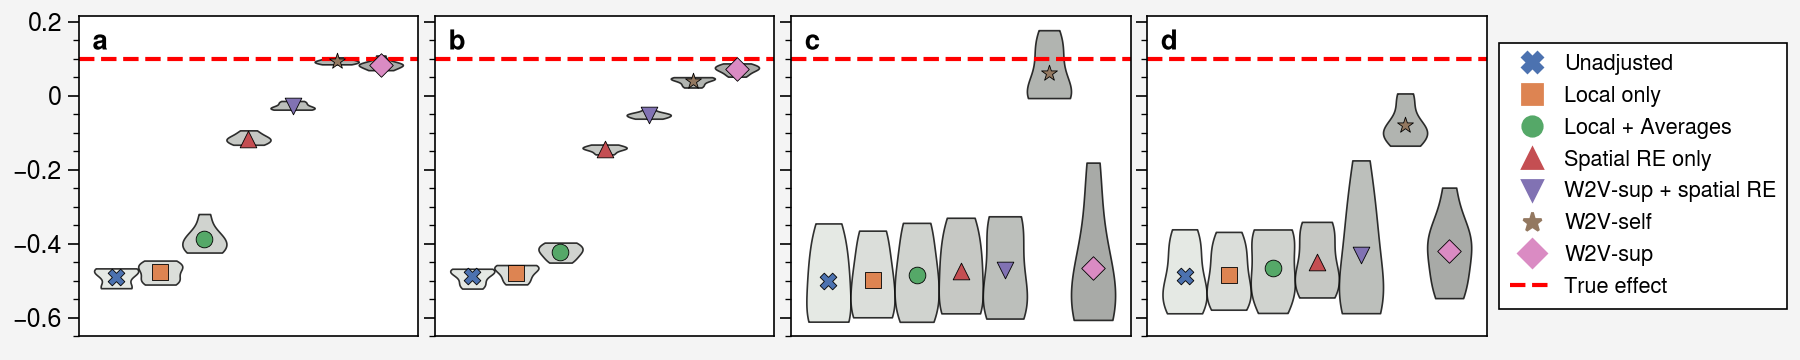

In [16]:
fig, ax = pplt.subplots(nrows=1, ncols=4, wspace=0.66, span=False, figsize=(9.0, 1.8), abc=True, abcloc='ul', grid=False)
task_names = {
    "basic": "Linear (Dense)",
    "nonlinear": "Non-linear (Dense)",
    "basic_sparse": "Linear (Sparse)",
    "nonlinear_sparse": "Non-linear (Dense)",
}

lab_names = {
    "nocov": "Unadjusted", "spatial": "Spatial RE only", "unsup": "W2V-self", "w2vec": "W2V-sup", "local": "Local only", "avs": "Local + Averages", "w2vec_spa": "W2V-sup + spatial RE"
}
labs = ["tau_nocov", "tau_local", "tau_avs", "tau_spatial", "tau_w2vec_spa", "tau_unsup", "tau_w2vec"]
markers = ["X", "s", "o", "^", "v", "*", "D", "P"]
colors = sns.color_palette("deep", n_colors=len(labs))
for i, d in enumerate(task_names.keys()):
    taudf = df[df.task == d][labs]
    # f0 = (1.0 if ("sparse" in d) else 1.8)
    # f1 = (0.0 if ("sparse" in d) else 0.08)
    f0 = 1.0 # (1.0 if ("sparse" in d) else 1.8)
    f1 = 0.0 # (0.0 if ("sparse" in d) else 0.08)
    labs2 = [x.replace("tau_", "") for x in labs]
    ax[i].violin(taudf * f0 - f1, cycle="grey", widths=1, points=100, fillalpha=np.full(taudf.shape[1], 0.8))
    mu = taudf.mean(axis=0)
    for j in range(len(lab_names)):
        ax[i].scatter(j, mu[j] * f0 - f1, marker=markers[j], color=colors[j], markeredgewidth=0.3, zorder=10, markeredgecolor="black")
    ax[i].axhline(0.1, color="red", linestyle="--", label="truth")
    ax[i].set_xticks([])
    if i == 3:
        import matplotlib.patches as mpatches, matplotlib.lines as mlines
        import seaborn as sns
        patches = [
            # mpatches.Patch(color=colors[i], label=lab_names[labs2[i]], marker=2)
            mlines.Line2D([], [], color=colors[i], label=lab_names[labs2[i]], marker=markers[i], markersize=7, linewidth=0)
            for i in range(len(labs2))
        ] + [mlines.Line2D([], [], color="red", linestyle="--", label="True effect")]
        ax[i].legend(handles=patches, loc="r", ncol=1, framealpha=1.0, bbox_to_anchor=(0.0, 0.5
        ), prop = {'size' : 7.8})
        # ax[i].legend(handles=patches, loc="upper left"  , framealpha=1.0, bbox_to_anchor=(0.0, 1.35
        # ), ncol=4, prop = {'size' : 7.8})

plt.savefig("../figures/simstudy_results.png", bbox_inches="tight")
